# Modelling the Epidemic Using SIR Model

The simples model for describing an epidemic is called **[SIR model][SIR]**, because it contains three variables:

* $S(t)$ - **Susceptible** - number of people who have the potential to be infected
* $I(t)$ - **Infected** - number of infected people
* $R(t)$ - **Recovered** - number of people who are non susceptible to infection (this includes the number of deceased people as well).

In this model, each variable is a function of time, and we can formulate the following differential equations that describe the behaviour of the model:

$$
\begin{array}{ll}
\frac{dS}{dt} & = -\frac{\beta SI}{N} \cr
\frac{dI}{dt} & = \frac{βSI}{N}−γI \cr
\frac{dR}{dt} & =γI
\end{array}
$$

This model depends on two parameters:

* β is the **contact rate**, and we assume that in a unit time each infected individual will come into contact with βN people. From those people, the proportion of susceptible people is S/N, thus the speed at which new infections occur is defined as $-\frac{βSI}{N}$.
* γ is the **recovery rate**, and the number 1/γ defines the number of days during which a person stays infected. Thus the term γI defines the speed, at which infected individuals are moved from being infected to recovered.

To model the epidemic, we need to solve those differential equations numerically with some initial conditions $S(0)$, $I(0)$ and $R(0)$. We will use the example from the followig book:

*Christian Hill. Learning Scientific Programming with Python. -- Cambridge University Press, ISBN: 9781107428225*, [available online](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

In [1]:
import sys
!{sys.executable} -m pip install --user --quiet -r ../requirements.txt

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Modelling the Abstract Epidemic

First, we define parameters of a city:

In [13]:
# Population, N.
N = 12000000
# Initial Number of infected and recovered, I0 and R0.
I0, R0 = 100, 0
# The rest (S0) are potentially susceptible
S0 = N - I0 - R0

# Transmission coefficient beta and inverse mean time to recovery gamma (in 1/day).
beta, gamma = 0.2, 1./20

# Number of days to compute:
days = 160

Let's define compuational grid:

In [14]:
t = np.linspace(0, days, days)

First, let's define the right-hand-side of the differential equations. We assume that the vector `y` contains three values (S, I and R):

In [15]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

We define the initial vector (boundary conditions) and solve the equation using `odeint`:

In [16]:
# Initial Vector
y0 = S0, I0, R0
# Solve SIR equations on time grid t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

Now let's plot the graph:

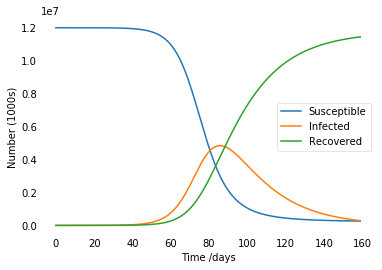

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(S,label='Susceptible')
ax.plot(I,label='Infected')
ax.plot(R,label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [25]:
print("R0={}".format(beta/gamma))

R0=4.0


Below is the function that allows us to easily experiment with different parameters:

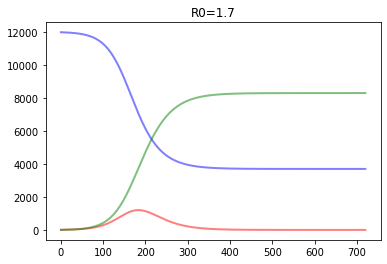

In [26]:
def experiment(beta, gamma, days):
    t = np.linspace(0, days, days)
    y0 = N-10000, 10000, 0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered')
    plt.title('R0={}'.format(beta/gamma))
    plt.show()
    
experiment(0.085,1/20,720)

## Modelling Epidemic in Moscow 

Let's try to model the epidemic in a real city of Moscow. We start by getting the real data:

In [29]:
import pandas as pd
df = pd.read_csv('../data/Data_Moscow.csv')
df[["Delta_Infected", "Delta_Recovered","Delta_Fatalities"]] = df[["Delta_Infected", "Delta_Recovered","Delta_Fatalities"]].apply(pd.to_numeric)
df["Date"] = pd.to_datetime(df["Date"],format="%d.%m.%Y")
df.head(5)

,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities
0,2020-03-01,0,0,0
1,2020-03-02,0,0,0
2,2020-03-03,0,0,0
3,2020-03-04,0,0,0
4,2020-03-05,0,0,0


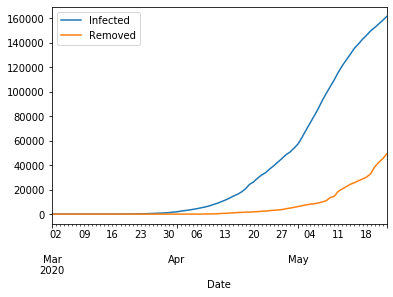

In [30]:
df["Infected"] = df["Delta_Infected"].cumsum()
df["Recovered"] = df["Delta_Recovered"].cumsum()
df["Fatalities"] = df["Delta_Fatalities"].cumsum()
df["Removed"] = df["Recovered"] + df["Fatalities"]
df["Active"] = df["Infected"] - df["Removed"]
df.plot('Date',['Infected','Removed'])

In [31]:
df.head(20)

,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities,Infected,Recovered,Fatalities,Removed,Active
0,2020-03-01,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0,0
2,2020-03-03,0,0,0,0,0,0,0,0
3,2020-03-04,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,0,0,0,0,0,0
5,2020-03-06,5,0,0,5,0,0,0,5
6,2020-03-07,0,0,0,5,0,0,0,5
7,2020-03-08,0,0,0,5,0,0,0,5
8,2020-03-09,3,0,0,8,0,0,0,8
9,2020-03-10,3,0,0,11,0,0,0,11


Let's start with the date of 100 infected people. We create separate dataframe that starts from that date:

In [32]:
I0 = df.iloc[18]["Infected"]
start_date = df.iloc[18]["Date"]
df["Day"] = (df["Date"]-start_date).apply(lambda d : d.days)
ndf = df.iloc[18:].copy()
days = df['Day'].max()
ndf.head(1000)

,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities,Infected,Recovered,Fatalities,Removed,Active,Day
18,2020-03-19,12,0,0,98,0,0,0,98,0
19,2020-03-20,33,0,0,131,0,0,0,131,1
20,2020-03-21,6,0,0,137,0,0,0,137,2
21,2020-03-22,54,0,0,191,0,0,0,191,3
22,2020-03-23,71,0,0,262,0,0,0,262,4
...,...,...,...,...,...,...,...,...,...,...
79,2020-05-19,3545,2583,71,149606,31290,1622,32912,116694,61
80,2020-05-20,2699,5440,75,152305,36730,1697,38427,113878,62
81,2020-05-21,2913,3746,68,155218,40476,1765,42241,112977,63
82,2020-05-22,2988,2900,73,158206,43376,1838,45214,112992,64


Now let's create a function that will model the epidemic with given parameters and then return the value of loss:

In [35]:
t = np.linspace(0,days+1,days+1)

def sol(ndf,beta=beta,gamma=gamma,ndays=20):
    y0 = N-I0,I0,0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    ndf.loc[:,"Infected_Pre"] = list(I+R)
    ndf["Delta_Infected_Pre"] = ndf["Infected_Pre"].rolling(2).apply(lambda x: x.iloc[1]-x.iloc[0])
    ndf["Diff"] = np.square(ndf["Delta_Infected"]-ndf["Delta_Infected_Pre"])
    return ndf.iloc[:ndays]["Diff"].sum()
    
err = sol(ndf)
print("Error = ",err)
print("Beta = ",beta)
print("R0 = ",beta/gamma)
ndf.head()

Error =  766087.3926249896
Beta =  0.2
R0 =  4.0


,Date,Delta_Infected,Delta_Recovered,Delta_Fatalities,Infected,Recovered,Fatalities,Removed,Active,Day,Infected_Pre,Delta_Infected_Pre,Diff
18,2020-03-19,12,0,0,98,0,0,0,98,0,98.000000,NaN,NaN
19,2020-03-20,33,0,0,131,0,0,0,131,1,119.496869,21.496869,132.322023
20,2020-03-21,6,0,0,137,0,0,0,137,2,144.530271,25.033402,362.270401
21,2020-03-22,54,0,0,191,0,0,0,191,3,173.681993,29.151722,617.436909
22,2020-03-23,71,0,0,262,0,0,0,262,4,207.629524,33.947530,1372.885508


## Optimize Loss to Get the Parameters of the Model

To get the actual parameters of the model, we need to optimize this function to minimize loss.

In [39]:
from scipy.optimize import minimize
from functools import partial
res = minimize(lambda x:sol(ndf,x[0],x[1],ndays=10),x0=[beta,gamma],method='powell')
print(res)

direc: array([[0.0444377 , 0.06725787],
       [0.0004795 , 0.00056685]])
     fun: 7799.22869216871
 message: 'Optimization terminated successfully.'
    nfev: 179
     nit: 5
  status: 0
 success: True
       x: array([0.31237857, 0.12760493])


In [40]:
the_beta, the_gamma = res.x[0],res.x[1]
print("Computed values: beta={},1/gamma={},R0={}".format(the_beta,1/the_gamma,the_beta/the_gamma))

Computed values: beta=0.31237856902541505,1/gamma=7.836687578799403,R0=2.448013251764602


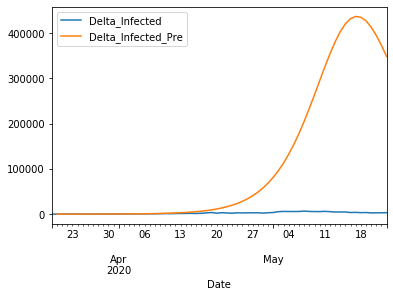

In [41]:
sol(ndf,the_beta,the_gamma)
ndf.plot('Date',['Delta_Infected','Delta_Infected_Pre'])